## Final project

** James N. Vance **

Find the solution of 

$$
-\Delta \mathbf u + \mathbf u = \mathbf f 
$$

on a cube $[0,1]^3$. For the sake of simplicity you can consider just **one finite element** and homogeneous Neumann boundary conditions. 

Consider Lagrangian finite elements, with Chebyshev nodes, of high order (up to 30--40).

The above problem can be rewritten in matrix form as

$$
(K+M)\mathbf u = \mathbf f
$$

where $K$ is the stiffness matrix, and $M$ is the mass matrix.



## 1.
Assemble the matrices and solve the system with a **direct solver**. Plot (loglog) the $L_2$ norm of the error with respect to a known exact solution as function of the degree of the finite element. 

**Solution:**

Our goal is to find the solution to the PDE $-\nabla^2 u + u = f$ 
on the cubic domain $\Omega=[0,1]^3$ with the homogeneous Neumann boundary conditions $\partial u/\partial n = 0$ on $\partial \Omega$. Integrating the PDE over the domain $\Omega$ and imposing the boundary conditions yields the weak formulation
$$
\int_\Omega \nabla u \cdot \nabla v + \int_\Omega u \cdot v = \int_\Omega f \cdot v, ~~~~ \forall v \in H_1^1(\Omega)
$$

We approximate the solution in the finite element subspace
$$
\int_\Omega \nabla u_h \cdot \nabla v_h + \int_\Omega u_h \cdot v_h = \int_\Omega f \cdot v_h, ~~~~ \forall v_h \in V_h
$$
and choose basis functions $\phi_I$ such that
$$u_h = \sum_{I \in \mathcal I_s} c_I \phi_I$$
where $c_I$'s are the degrees of freedom and $\mathcal I_s$ is the index set for the linear expansion.

With the expansion linear expansion proposed earlier, we rewrite the problem into
\begin{align}
\int_\Omega \nabla \left( \sum_{I \in \mathcal I_s } c_I \phi_I  \right) \cdot \nabla  \phi_J + \int_\Omega \left( \sum_{I \in \mathcal I_s } c_I \phi_I  \right) \cdot \phi_J &= \int_\Omega f \cdot \phi_J, ~~~~ \forall J \in \mathcal I_s \\
\sum_{J \in \mathcal I_s } c_J \left( \int_\Omega \nabla \phi_J   \cdot \nabla  \phi_J + \int_\Omega \phi_I \cdot \phi_J \right) &= \int_\Omega f \cdot \phi_J, ~~~~ \forall J \in \mathcal I_s
\end{align}

This is equivalent to solving the linear system
$$
(\hat K + \hat M)\mathbf c = \mathbf F
$$
where
\begin{align}
K_{I,J} &= \int_\Omega \nabla \phi_I   \cdot \nabla  \phi_J, & M_{I,J} &= \int_\Omega \phi_I \cdot \phi_J, & F_{J} &= \int_\Omega f \cdot \phi_J
\end{align}

Using the index notation $I := (i,j,k) \in \mathcal I_s$, we adapt the basis functions in the polynomial space

$$
\mathscr P^{n,m,l}: \mathrm {span}\{ p_{i,j,k}(x,y,z) \}_{i,j,k=0}^{n,m,l} $$

Imposing separability, we may write these polynomials as 

\begin{align}
p_{i,j,k}(x,y,z) = p_i(x) p_j(y) p_k(z)
\end{align}

where $i=0 \dots n,~j=0 \dots m,~k=0 \dots l$, and $n$, $m$ and $l$ are the degrees of the polynomial in $x$,$y$ and $z$, respectively. 

Four each basis, we choose the Lagrange interpolating polynomial, whose form in one dimension is given by

$$
p_i^n(x) = \prod_{j=0,j \neq i}^{n} \frac{x-x_j}{x_i-x_j}
$$

where $x_i$'s are interpolation points corresponding to the nodes of our finite element.

We construct these one-dimensional basis functions given the node points and the degree of interpolation using the following functions:

In [1]:
%matplotlib inline
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt


def ConstructDualBasis(nodes): 
    N = []
    for i in range(len(nodes)):
        nodefunc = lambda f, i = i : f(nodes[i])
        N.append(nodefunc)
    return N


def BasisPolynomials(deg):
    P = []
    for i in range(deg+1):
        c = np.zeros((i+1,))
        c[-1] = 1
        P.append(poly.Polynomial(c))
    return P


def ConstructCij(N,P):
    C = np.zeros((0,len(P)))
    for dof in N:
        row = np.array([])
        for p in P:
            row = np.hstack((row,dof(p)))
        C = np.vstack((C,row))
    return C


def ConstructCanonicalBasis(C):
    from scipy.linalg import solve
    
    V = []
    for k in range(C.shape[0]):
        delta_ij = np.zeros(C.shape[0])
        delta_ij[k] = 1
        vk = solve(C,delta_ij)
        V.append(poly.Polynomial(vk))
    return V


To minimize the effect of oscillations at the edges of the interpolation, known as Runge's phenomenon, we use  Chebyshev nodes in determining interpolation points. On the interval $[0,1]$ the Chebyshev nodes are given by

$$ x_k = \frac{1}{2} + \frac{1}{2} \cos\left(\frac{2k-1}{2n}\pi\right), ~~ k=1,2,\dots n $$

In [2]:
def ChebyshevNodes(n): # n is the number of desired nodes
    return [0.5+0.5*np.cos((2.*k-1.)/(2.*n)*np.pi) for k in range(1,n+1)]


The problem in 3D can be simplified by expressing everything in terms of the similar problem in one dimension

$$
-\partial^2_x u(x) + u(x) = f(x)
$$

whose weak form in the finite element subspace is expressed as 

$$
\int_{0}^{1} u_h'(x) v_h'(x)~\mathrm dx + \int_{0}^{1} u_h(x) v_h(x) ~\mathrm dx  = \int_{0}^{1} f v_h(x), ~~~~ \forall v_h \in V_h
$$

By choosing the expansion,

$$ u_h(x) = \sum_{i=0}^{n} c_i p_i(x)$$

it can be shown that the problem reduces to the linear system

$$ (\hat k + \hat  m) \mathbf c = \mathbf f $$

where 

\begin{align}
k_{i,j} &= \int_{0}^{1}  \phi_i'(x)   \phi_j'(x) \mathrm d x, & m_{i,j} &= \int_{0}^{1}  \phi_i(x)   \phi_j(x) \mathrm d x, & f_{j} &= \int_{0}^{1}  f(x)  \phi_j(x) \mathrm d x
\end{align}




<!--A_{I,J} =& \int_\Omega \nabla (p_i(x) p_j(y)& p_k(z))   \cdot \nabla  (p_q(x) p_r(y) p_s(z)) \\-->

We construct stiffness matrix $\hat k$, mass matrix $\hat m$ and the right-hand side vector $\mathbf f$ for the one dimensional case using the following functions:

In [3]:
from numpy.polynomial.legendre import leggauss

def ConstructKM1D(degree):
    nnodes = degree + 1
    nodes  = ChebyshevNodes(nnodes)

    N = ConstructDualBasis(nodes) 
    E = BasisPolynomials(degree)
    C = ConstructCij(N,E)
    V = ConstructCanonicalBasis(C)

    nquad = 2*len(N)-1         # number of quadrature points
    q,w   = leggauss(nquad)    # on interval [-1,+1]
    q     = (q+1)/2            # rescale to  [ 0,+1]
    nder  = 2                  # obtain 0th and 1st derivatives

    Lq = np.zeros((nder,nnodes,nquad))
    for i in range(nder):
        for j in range(nnodes):
            Lq[i][j] = V[j].deriv(i)(q)

    M = np.einsum('jq, iq, q -> ij', Lq[0], Lq[0], w, optimize=True)
    K = np.einsum('jq, iq, q -> ij', Lq[1], Lq[1], w, optimize=True)

    return K, M, V


def ConstructF1D(f,V,degree):
    
    nnodes = len(V)
    nquad  = 2*(degree+1)-1     # number of quadrature points
    q,w    = leggauss(nquad)    # on interval [-1,+1]
    q      = (q+1)/2            # rescale to  [ 0,+1]
    nder   = 1                  # obtain 0th and 1st derivatives

    Lq = np.zeros((nder,nnodes,nquad))
    for i in range(nder):
        for j in range(nnodes):
            Lq[i][j] = V[j].deriv(i)(q)        
    
    fq = f(q)
    F = np.einsum('iq, q, q -> i', Lq[0], fq, w, optimize=True)
    
    return F

From the components of the 3D linear system,
\begin{align}
K_{I,J} &= \int_\Omega \nabla \phi_I   \cdot \nabla  \phi_J, & M_{I,J} &= \int_\Omega \phi_I \cdot \phi_J, & F_{J} &= \int_\Omega f \cdot \phi_J
\end{align}
setting 
$$ \phi_I = p_{i,j,k}(x,y,z) = p_i(x) p_j(y) p_k(z) $$ 
and 
$$ \phi_J = p_{q,r,s}(x,y,z) = p_q(x) p_r(y) p_s(z) $$ 

and imposing a separable right-hand side function for simplicity, i.e.

$$
f(x,y,z) = f(x)f(y)f(z)
$$

we can rewrite the the 3D equations as 

\begin{eqnarray}
M_{I,J} =& \int_0^1 p_i(x)p_q(x)~\mathrm dx &
             \int_0^1 p_j(y)p_r(y)~\mathrm dy 
             \int_0^1 p_k(z)p_s(z)~\mathrm dz \\
K_{I,J} =& \int_0^1\int_0^1\int_0^1 \big( &
            p_i'(x) p_j(y) p_k(z) p_q'(x) p_r(y) p_s(z) +p_i(x) p_j'(y) p_k(z) p_q(x) p_r'(y) p_s(z) \\
         &&+p_i(x) p_j(y) p_k'(z) p_q(x) p_r(y) p_s'(z) 
        ~\big)~\mathrm dx~\mathrm dy~\mathrm dz \\
F_{J} =& \int_0^1 f(x)p_q(x)~\mathrm dx &
             \int_0^1 f(y)p_r(y)~\mathrm dy 
             \int_0^1 f(z)p_s(z)~\mathrm dz &
\end{eqnarray}

Thus, the 3D case may now be expressed as tensor products of their one-dimensional equivalents:

\begin{eqnarray}
M_{I,J} &=& m_{i,q} m_{j,r} m_{k,s} \\
K_{I,J} &=& k_{i,q} m_{j,r} m_{k,s} +  m_{i,q} k_{j,r} m_{k,s} + m_{i,q} m_{j,r} k_{k,s} \\
F_{J} &=& f_{q} f_{r} f_{s}
\end{eqnarray}

The following function assembles the 3D linear system and calls a function `linsolve` to calculate the solution

In [4]:
def FEM_solve(degree,f_rhs,solver=None,view=False,P=None):
    k,m,v = ConstructKM1D(degree)
    f     = ConstructF1D(f_rhs,v,30)               # Degree of RHS independent of LHS

    F = np.einsum('i,j,k->ijk',f,f,f)              # Right-hand side
    F = np.reshape(F,np.prod(F.shape))

    if view:                                       # Also returns the full linear system
        M  = np.einsum('ij,kl,mn->ikmjln',m,m,m,optimize=True)   # Mass matrix
        M  = np.reshape(M, (np.prod(M.shape[:3]),np.prod(M.shape[3:])))
        K  = np.einsum('ij,kl,mn->ikmjln',k,m,m,optimize=True)   # Stiffness matrix
        K += np.einsum('ij,kl,mn->ikmjln',m,k,m,optimize=True)
        K += np.einsum('ij,kl,mn->ikmjln',m,m,k,optimize=True)
        K  = np.reshape(K, (np.prod(K.shape[:3]),np.prod(K.shape[3:])))

        c,it = linsolve(K+M,F,solver=solver,overwrite=False,P=P)

        return c,v,K,M,F,it

    else:                                          # Returns only the result
        A  = np.einsum('ij,kl,mn->ikmjln',m,m,m,optimize=True)       
        A += np.einsum('ij,kl,mn->ikmjln',k,m,m,optimize=True)
        A += np.einsum('ij,kl,mn->ikmjln',m,k,m,optimize=True)
        A += np.einsum('ij,kl,mn->ikmjln',m,m,k,optimize=True)
        A  = np.reshape(A, (np.prod(A.shape[:3]),np.prod(A.shape[3:])))

        c,it = linsolve(A,F,solver=solver,overwrite=True,P=P)

        return c,v,it
    

The linear solver that we have implemented uses the Cholesky decomposition approach since the matrix $\hat A = \hat K + \hat M$ is symmetric and positive definite. We also decorated the function with the numba `@jit` directive for increased performance. 

In [5]:
from numba import jit

@jit(nopython=True)
def cholesky(A):
    N = len(A)
    for k in range(N-1):
        A[k,k] = np.sqrt(A[k,k])
        A[k+1:N,k] = A[k+1:N,k]/A[k,k]
        for j in range(k+1,N):
            A[j:N,j] = A[j:N,j] - A[j:N,k]*A[j,k]     
    A[-1,-1] = np.sqrt(A[-1,-1])
    return A

@jit(nopython=True)
def L_solve(L,rhs):
    N = len(L)
    sol = np.zeros(N)
    sol[0] = rhs[0]/L[0,0]
    for k in range(1,N):
        sol[k] = (rhs[k] - np.dot(L[k,:k], sol[:k])) / L[k,k]        
    return sol

@jit(nopython=True)
def U_solve(U,rhs):
    N = len(U)
    sol = np.zeros(N)
    sol[-1] = rhs[-1]/U[-1,-1]
    for k in range(N-1):
        sol[N-k-2] = (rhs[N-k-2] - np.dot(U[N-k-2,N-k-1:N-1], sol[N-k-1:N-1])) / U[N-k-2,N-k-2]
    return sol


The generic function `linsolve` allows us to choose which type of solver to use.

In [6]:
def linsolve(A,b,solver=None,overwrite=False,P=None):
    if solver == 'my cholesky':
        if overwrite:
            A1 = A
        else:
            A1 = A.copy()
        HT = cholesky(A1)
        HT =np.tril(HT)
        H = HT.transpose()
        y = L_solve(HT,b)
        c = U_solve(H,y)
        return c,0
        
    elif solver == 'my cg':
        c,it = linsolve_my_cg(A,b,overwrite,P)
        # implementation of iterative solver as provided in section 2
        return c,it
        
    elif solver == 'scipy cholesky':
        from scipy.linalg import cho_factor, cho_solve
        c,lower = cho_factor(A,b,overwrite_a=overwrite)
        c = cho_solve((c, lower),b,overwrite_b=overwrite)
        return c,0
        
    elif solver == 'scipy cg':
        from scipy.sparse.linalg import cg
        c,info = cg(A,b) 
        return c,info
        
    elif solver == 'scipy linalg':
        from scipy.linalg import solve
        c = solve(A,b)
        return c,0
    
    else:
        raise NameError, "Solver not specified"
    
    

We also asses the L2 norm of the error using the following function with uniform mesh

In [7]:
def L2norm(U): 
    return np.sqrt(np.sum(U*U))/(np.product(U.shape))


We also interpolate the solution to a uniform mesh for plotting and error calculation:

In [8]:
def FEM_error(degree,u_ex,c,v,ns,view=False):
    n = degree + 1
    s = np.linspace(0,1,ns)
    Ls = np.zeros((n, ns))
    for j in range(n):
        Ls[j] = v[j](s)
    C = np.einsum('is, jk, pq -> skqijp', Ls, Ls, Ls,optimize=True)

    uex1D = u_ex(s)
    Uex   = np.einsum('i,j,k->ijk',uex1D,uex1D,uex1D,optimize=True)

    U = np.einsum('skqijp, ijp', C, c.reshape((n,n,n)),optimize=True)
    
    if view:
        return L2norm(U-Uex),U,Uex,s
    else:
        return L2norm(U-Uex)
    

And we write some miscellaneous for plotting:

In [9]:
def surfplot(X,Y,U,filename=''):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    import matplotlib.pyplot as plt
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, U, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    if filename != '': plt.savefig(filename)
    plt.show()    


def cmplot(U,filename=''):
    import matplotlib.pyplot as plt
    plt.imshow(U)
    plt.colorbar()
    if filename != '': plt.savefig(filename)
    plt.show()
    

Now, we execute a sample calculation using the exact solution:

$$
u_{\mathrm{ex}}(x,y,z) = \cos(kx)\cos(ky)\cos(kz)
$$

which satisfies the boundary conditions $\partial u/\partial n = 0$ at the boundaries. The right-hand side becomes

$$
f(x,y,z) = (1+k^2)^3 \cos(kx)\cos(ky)\cos(kz)
$$




In [10]:
kk     = 3*np.pi
f_rhs  = lambda x: np.power(1+kk**2,1.0/3.0)*np.cos(kk*x)
u_ex   = lambda x: np.cos(kk*x) 

deg = 10
ns  = 30

c,v,K,M,F,it    = FEM_solve(deg,f_rhs,'my cholesky',True)
err_fem,U,Uex,s = FEM_error(deg,u_ex,c,v,deg+1,True) # Interpolated with same degree as FE
err_int,U,Uex,s = FEM_error(deg,u_ex,c,v,ns,True)    # Interpolated with higher degree than FE

The following plots the solution $u(x,y,z)$ at $z=2.5$. Also shown is a plot of the corresponding matrix values.

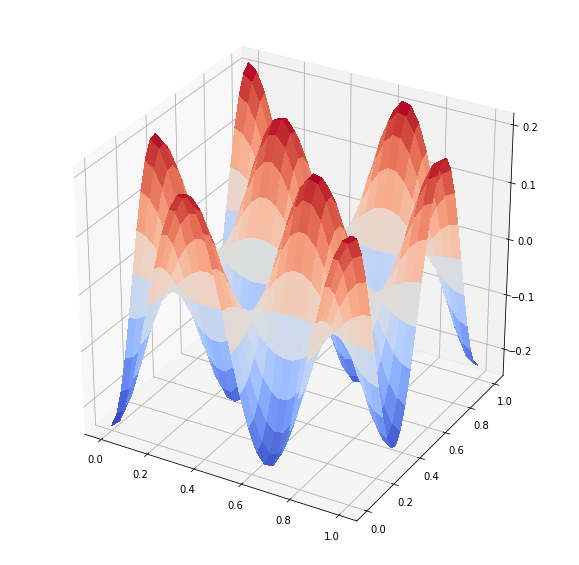

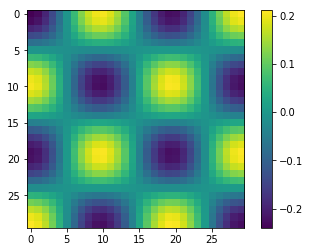

FEM Error: 0.00733341992989


In [11]:
U_slice = U[int(len(s)/4)]
X, Y = np.meshgrid(s,s)
surfplot(X,Y,U_slice)
cmplot(U_slice)
print("FEM Error: {}".format(err_fem))

We now look at the relationship between the degree of the finite element with the $L_2$ norm of the error using the following function.

In [12]:
def FEM_assess(deg0,deg1,solver,P=None):
    from time import time

    kk     = 3*np.pi
    f_rhs  = lambda x: np.power(1+kk**2,1.0/3.0)*np.cos(kk*x)
    u_ex   = lambda x: np.cos(kk*x)

    degrees  = range(deg0,deg1+1)
    error    = []
    runtime  = []
    its      = []
    
    filename = "data-{}-{}-{}-{}.txt".format(solver,str(P),degrees[0],degrees[-1])
    print("Writing data to {}".format(filename))
    print("Degree\tL2norm of error\tTime\t\tIter".format(filename))
    with open(filename,"w") as f:
        f.write('')

    loop_start = time()
    for degree in degrees:
        start = time()
        c,v,it = FEM_solve(degree,f_rhs,solver,False,P=P)
        error.append(FEM_error(degree,u_ex,c,v,len(v)))
        runtime.append(time()-start)
        its.append(it)
        line = "%d\t%f\t%f\t%d"%(degree, error[-1], runtime[-1],it)
        with open(filename,"a") as f: 
            f.write(line)
            f.write("\n")
        print(line)
    print("Loop:\t\t\t%f"%(time()-loop_start))

    return degrees, error, runtime, its


In [13]:
def errorplot(degrees, error):
    plt.loglog(degrees,error,'o-')
    plt.xlabel('Degree of finite element')
    plt.ylabel('$L_2$ norm of error')
    plt.show()

def timeplot(degrees, runtime):
    plt.semilogy(degrees,runtime,'o-')
    plt.xlabel('Degree of finite element')
    plt.ylabel('Runtime (s)')
    plt.show()
    

**Note:** To speed up calculation, `scipy cholesky` is used by default. Custom solver `my cholesky` may be specified instead.

In [14]:
degrees_ch_loc, error_ch_loc, runtime_ch_loc, it_ch_loc = FEM_assess(3,10,'my cholesky') 

Writing data to data-my cholesky-None-3-10.txt
Degree	L2norm of error	Time		Iter
3	0.092599	0.015934	0
4	0.020444	0.026454	0
5	0.021297	0.039930	0
6	0.016500	0.088861	0
7	0.012368	0.327339	0
8	0.010168	0.360922	0
9	0.008567	1.071532	0
10	0.007333	5.831899	0
Loop:			7.767331


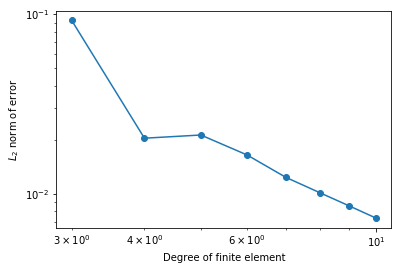

In [15]:
errorplot(degrees_ch_loc, error_ch_loc)

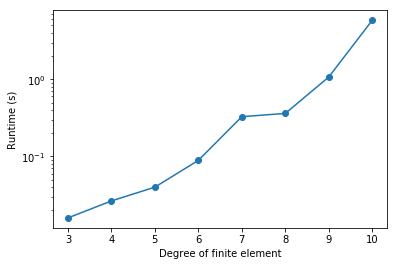

In [16]:
timeplot(degrees_ch_loc, runtime_ch_loc)

We also ran the calculations on the C3E cluster and obtained the following results:

In [17]:
degrees_ch_c3e, error_ch_c3e, runtime_ch_c3e = np.genfromtxt("./project/data_chol.txt").T

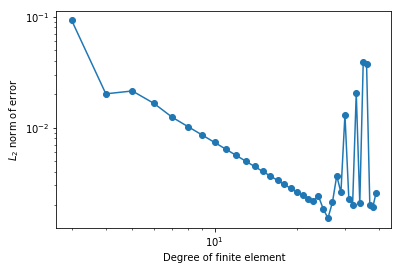

In [18]:
errorplot(degrees_ch_c3e, error_ch_c3e)

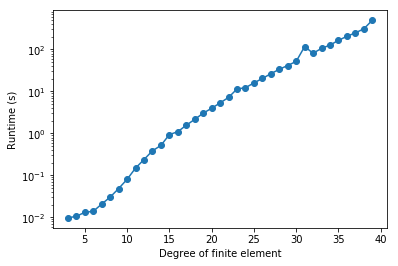

In [19]:
timeplot(degrees_ch_c3e, runtime_ch_c3e)

## 2.
Use an iterative solver with a chosen preconditioner. Compare and comment the computational burden between the direct and iterative case.

We choose the conjugate gradient method as our iterative solver since the LHS matrix $\hat A = \hat K + \hat M$ is symmetric and positive definite. The function `CG` provides the implementation with an optional preconditioner `P`. As preconditioner, we implement the Incomplete Cholesky decomposition for most of our calculations. We also provide three other trivial options: None, Jacobi and the matrix A itself.

The function `linsolve_my_cg` is called from the earlier implemented `linsolve` to perform the conjugate gradient method.

In [20]:
from numpy.linalg import norm,solve


def CG(A,b,P=None,eps=1e-10):
    
    x = np.zeros_like(b)    
    res = b - np.dot(A,x)

    if P is not None:
        z = solve(P,res)
    else:
        z = res.copy() 
    
    p = z.copy()

    x,it = CG_loop(A,P,p,x,res,eps)
                 
    return x,it


@jit(nopython=True)
def CG_loop(A,P,p,x,res,eps):
    it = 0
    n = len(A)
    tol = eps + 1
    while (it < n and tol > eps):
        it    += 1
        q      = np.dot(A,p)
        pAp    = np.dot(p,q)                
        alpha  = np.dot(p,res) / pAp
        x     += alpha * p
        res   -= alpha * q
        tol    = norm(res,2)
        
        if P is not None:
            z = solve(P,res)
        else:
            z = res.copy()
        
        beta = np.dot(q,z) / pAp
        p    = z - beta * p   
    
    return x,it


def linsolve_my_cg(A,b,overwrite,P):
    if P is None:
        c,it = CG(A,b)
    elif P == 'A':
        c,it = CG(A,b,A)
    elif P == 'jacobi':
        pre  = np.diag(np.diag(A))
        c,it = CG(A,b,pre)
    elif P == 'incomplete cholesky':
        pre  = A.copy()
        pre  = IncompleteCholesky(pre)
        c,it = CG(A,b,pre)
    else:
        print("Specify correct preconditioner")
        return None        
    return c,it


@jit(nopython=True)
def IncompleteCholesky(P):
    n = len(P)

    for k in range(n):
        P[k,k] = np.sqrt(P[k,k])
        for i in range(k+1,n):
            if (P[i,k]!=0):
                P[i,k] = P[i,k]/P[k,k]
        for j in range(k+1,n):
            for i in range(j,n):
                if P[i,j] != 0:
                    P[i,j] = P[i,j]-P[i,k]*P[j,k]
        
    for i in range(n):
        for j in range(i+1,n):
            P[i,j] = 0
    
    return P
        

In [21]:
kk     = 3*np.pi
f_rhs  = lambda x: np.power(1+kk**2,1.0/3.0)*np.cos(kk*x)
u_ex   = lambda x: np.cos(kk*x) 

deg = 10
ns  = 30

c,v,K,M,F,it    = FEM_solve(deg,f_rhs,'my cg',True,P='incomplete cholesky')
err_fem,U,Uex,s = FEM_error(deg,u_ex,c,v,deg+1,True) # Interpolated with same degree as FE
err_int,U,Uex,s = FEM_error(deg,u_ex,c,v,ns,True)    # Interpolated with higher degree than FE

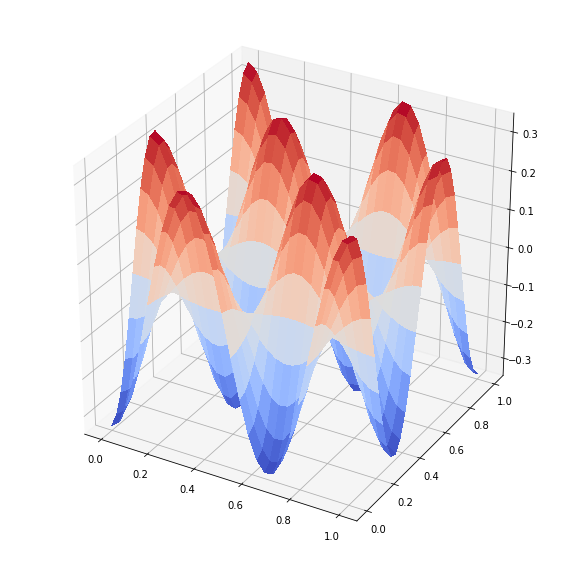

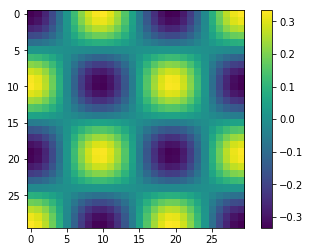

FEM Error: 0.00733412420209


In [22]:
U_slice = U[int(len(s)/3)]
X, Y = np.meshgrid(s,s)
surfplot(X,Y,U_slice)
cmplot(U_slice)
print("FEM Error: {}".format(err_fem))

In [23]:
degrees_cg_loc, error_cg_loc, runtime_cg_loc, it_cg_loc = FEM_assess(3,10,'my cg','incomplete cholesky')

Writing data to data-my cg-incomplete cholesky-3-10.txt
Degree	L2norm of error	Time		Iter
3	0.092489	0.028248	56
4	0.020130	0.079272	67
5	0.021366	0.095557	75
6	0.016496	0.334813	86
7	0.012370	1.074733	92
8	0.010170	1.790829	101
9	0.008567	4.508483	110
10	0.007334	15.853952	119
Loop:			23.770282


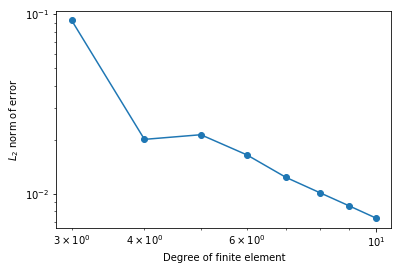

In [24]:
errorplot(degrees_cg_loc,error_cg_loc)

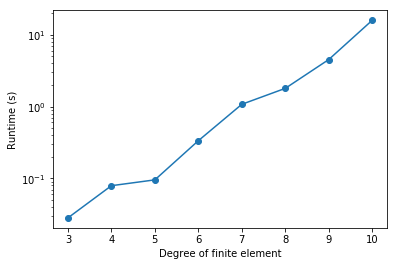

In [25]:
timeplot(degrees_cg_loc,runtime_cg_loc)

The following are runtime data obtained from the C3E cluster:

In [26]:
degrees_cg_c3e, error_cg_c3e, runtime_cg_c3e = np.genfromtxt("./project/data_cg.txt").T

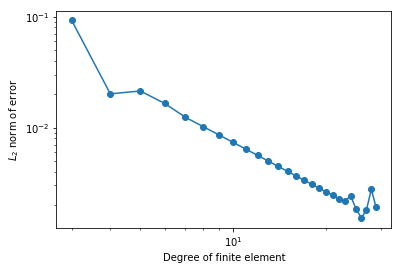

In [27]:
errorplot(degrees_cg_c3e,error_cg_c3e)

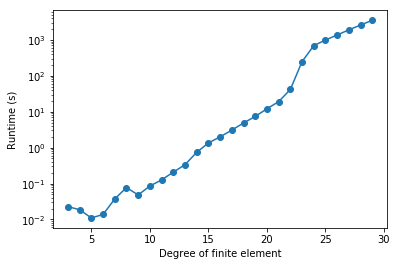

In [28]:
timeplot(degrees_cg_c3e,runtime_cg_c3e)

### Remarks:

For solving a system $Ax=b$ given an $n\times n$ matrix $A$, the total computational cost associated with Cholesky factorization consists of $\frac{1}{3}n^3$ flops for the factorization itself and $2n^2$ for the forward and backward substitution.

Conjugate gradient is known to be the most effective iterative solver for symmetric positive definite matrices. However, the large computational burden associated with conjugate gradient (CG) results from the multiplication of the matrix $A$ with the vector $p$ at each iteration. Considering only this step in the iteration would entail a computational cost of $n^3$ flops. To improve the performance of the CG method, the matrix-vector product $A\cdot p$ must be optimized. This is addressed in the next step.

3 - **OPTIONAL** Using the iterative solver, implement a matrix-free approach where the computation of the matrices is substituted with a  function which returns the *matrix-vector* product. In doing so, you must take care of rewriting the assemble of the matrix as a sum of many *matrix-matrix* products exploiting all the possible tensor products. 

Compare and comment the compuational cost of 100 matrix-vector product when the matrix is assembled and when it is computed on-the-fly as a function of the degree of the finite element.

In [29]:
from numpy.linalg import solve,norm

def ConstructLq(degree):
    nnodes = degree + 1
    nodes  = ChebyshevNodes(nnodes)

    N = ConstructDualBasis(nodes) 
    E = BasisPolynomials(degree)
    C = ConstructCij(N,E)
    V = ConstructCanonicalBasis(C)

    nquad = 2*len(N)-1         # number of quadrature points
    q,w   = leggauss(nquad)    # on interval [-1,+1]
    q     = (q+1)/2            # rescale to  [ 0,+1]
    nder  = 2                  # obtain 0th and 1st derivatives
    
    Lq = np.zeros((nder,nnodes,nquad))
    for i in range(nder):
        for j in range(nnodes):
            Lq[i][j] = V[j].deriv(i)(q)
    
    return Lq,w,V


# Implements the matrix-free multiplication of A
def Adotx_matrixfree(Lq,w,x): 
    n = Lq.shape[1]
    x = x.reshape((n,n,n))
    
    Ax  = np.einsum('ia, jb, kc, la, mb, nc, a, b, c, lmn -> ijk',
                    Lq[0], Lq[0], Lq[0], Lq[0], Lq[0], Lq[0], w, w, w, x, optimize=True)
    Ax += np.einsum('ia, jb, kc, la, mb, nc, a, b, c, lmn -> ijk',
                    Lq[1], Lq[0], Lq[0], Lq[1], Lq[0], Lq[0], w, w, w, x, optimize=True)
    Ax += np.einsum('ia, jb, kc, la, mb, nc, a, b, c, lmn -> ijk',
                    Lq[0], Lq[1], Lq[0], Lq[0], Lq[1], Lq[0], w, w, w, x, optimize=True)
    Ax += np.einsum('ia, jb, kc, la, mb, nc, a, b, c, lmn -> ijk',
                    Lq[0], Lq[0], Lq[1], Lq[0], Lq[0], Lq[1], w, w, w, x, optimize=True)
    
    return Ax.reshape(n**3)


# Matrix-free conjugate gradient method
def CG_matrixfree(Lq,w,b,P=None,eps=1e-10):
    x = np.zeros_like(b)    
    res = b - Adotx_matrixfree(Lq,w,x)

    if P is not None:
        z = solve(P,res)
    else:
        z = res.copy() 
    
    p = z.copy()

    x,it = CG_loop_matrixfree(Lq,w,P,p,x,res,eps)
                 
    return x,it


def CG_loop_matrixfree(Lq,w,P,p,x,res,eps):
    it = 0
    n = Lq.shape[1]
    tol = eps + 1
    while (it < n and tol > eps):
        it    += 1
        q      = Adotx_matrixfree(Lq,w,p)
        pAp    = np.dot(p,q)                
        alpha  = np.dot(p,res) / pAp
        x     += alpha * p
        res   -= alpha * q
        tol    = norm(res,2)
        
        if P is not None:
            z = solve(P,res)
        else:
            z = res.copy()
        
        beta = np.dot(q,z) / pAp
        p    = z - beta * p   
    
    return x,it

In [30]:
kk     = 3*np.pi
f_rhs  = lambda x: np.power(1+kk**2,1.0/3.0)*np.cos(kk*x)
u_ex   = lambda x: np.cos(kk*x) 

deg = 10
ns  = 30

Lq,w,V = ConstructLq(deg)
f      = ConstructF1D(f_rhs,V,30)
F      = np.einsum('i,j,k->ijk',f,f,f, optimize=True).reshape(f.shape[0]**3)
c,it   = CG_matrixfree(Lq,w,F)
err_fem,U,Uex,s = FEM_error(deg,u_ex,c,V,deg+1,True) # Interpolated with same degree as FE
err_int,U,Uex,s = FEM_error(deg,u_ex,c,V,ns,True)    # Interpolated with higher degree than FE

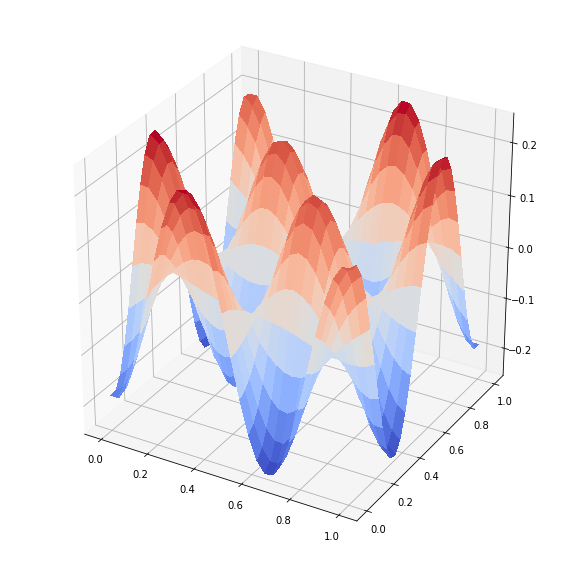

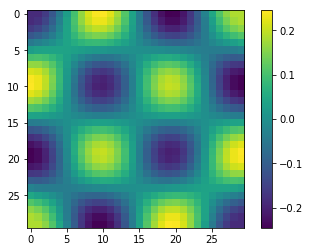

FEM Error: 0.00764463169655


In [31]:
U_slice = U[int(len(s)/4)]
X, Y = np.meshgrid(s,s)
surfplot(X,Y,U_slice)
cmplot(U_slice)
print("FEM Error: {}".format(err_fem))

### Comparison

We now compare the performance of matrix-free approach with the traditional approach.

In [32]:
import time 

def ConstructA(Lq,w): 
    n = Lq.shape[1]

    A  = np.einsum('ia, jb, kc, la, mb, nc, a, b, c -> ijklmn',
                    Lq[0], Lq[0], Lq[0], Lq[0], Lq[0], Lq[0], w, w, w, optimize=True)
    A += np.einsum('ia, jb, kc, la, mb, nc, a, b, c -> ijklmn',
                    Lq[1], Lq[0], Lq[0], Lq[1], Lq[0], Lq[0], w, w, w, optimize=True)
    A += np.einsum('ia, jb, kc, la, mb, nc, a, b, c -> ijklmn',
                    Lq[0], Lq[1], Lq[0], Lq[0], Lq[1], Lq[0], w, w, w, optimize=True)
    A += np.einsum('ia, jb, kc, la, mb, nc, a, b, c -> ijklmn',
                    Lq[0], Lq[0], Lq[1], Lq[0], Lq[0], Lq[1], w, w, w, optimize=True)

    return A.reshape((n**3,n**3))

degs = np.arange(3,20)
t_trad = np.zeros(len(degs))
t_mfree = np.zeros(len(degs))

for k,deg in enumerate(degs):
    
    x   = np.arange((deg+1)**3)
    iterations = 100

    Lq,w,v = ConstructLq(deg)

    # Traditional Implementation with numpy.dot
    start = time.time()
    A = ConstructA(Lq,w)   # Construct A once and store in memory
    for i in range(iterations):
        b1 = np.dot(A,x)
    stop  = time.time()
    t_trad[k] = stop-start

    # Matrix-free
    start = time.time()
    for i in range(iterations):
        b2 = Adotx_matrixfree(Lq,w,x)  # Construct A on the fly
    stop  = time.time()
    t_mfree[k] = stop-start

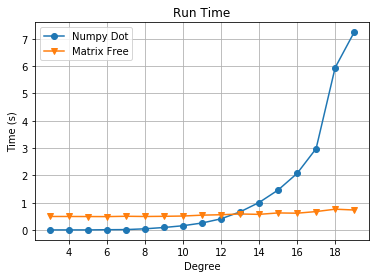

In [33]:
plt.plot(degs,t_trad,'o-',label='Numpy Dot')
plt.plot(degs,t_mfree,'v-',label='Matrix Free')
plt.ylabel('Time (s)')
plt.xlabel('Degree')
plt.grid()
plt.legend(loc=0)
plt.title('Run Time')
plt.show()

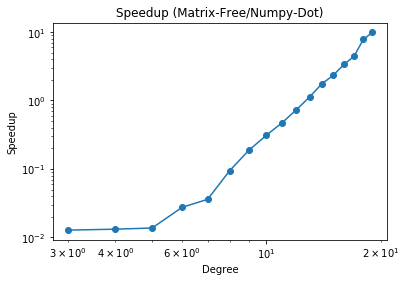

In [34]:
plt.loglog(degs,t_trad/t_mfree,'o-')
plt.ylabel('Speedup')
plt.xlabel('Degree')
plt.title('Speedup (Matrix-Free/Numpy-Dot)')
plt.show()

For smaller matrix sizes, the matrix-free approach is slower since it is dominated by the overhead in performing the several sums and tensor products. However, as the matrix size increases, the matrix-free approach scales better and becomes much faster than the traditional approach with the Numpy dot function. Another advantage to this approach is that the matrix $A$ is not stored into memory so linear systems resulting from a higher finite element degree could more easily be solved.